Dataset shape: (569, 30)
Classes present: [0. 1. 2.]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold accuracies: [0.96315789 0.97894737 0.98941799]
Mean accuracy: 0.9771744175252947


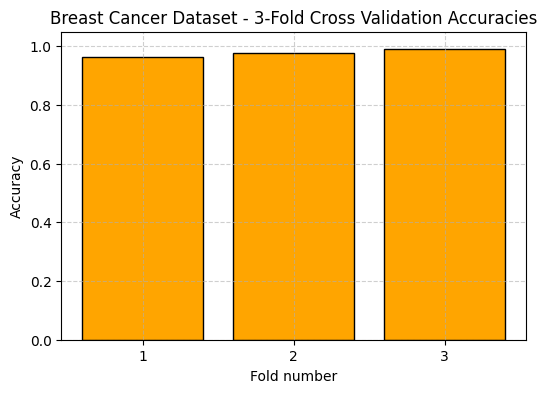

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


mean_radius = X[:, 0]
r33, r66 = np.percentile(mean_radius, [33, 66])

y_new = np.zeros(len(y))
y_new[mean_radius <= r33] = 0
y_new[(mean_radius > r33) & (mean_radius <= r66)] = 1
y_new[mean_radius > r66] = 2

print("Dataset shape:", X.shape)
print("Classes present:", np.unique(y_new))


model = LogisticRegression(max_iter=10000)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y_new, cv=kf, scoring='accuracy')

print("Fold accuracies:", scores)
print("Mean accuracy:", scores.mean())


plt.figure(figsize=(6,4))
plt.bar(range(1, 4), scores, color='orange', edgecolor='black')
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3])
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Dataset - 3-Fold Cross Validation Accuracies")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()